In [1]:
from PIL import Image
import torch
import torchvision.transforms as transforms
import torch.nn as nn
import PIL
import torch.optim as optim
import torch.nn as nn
from torch.autograd import Variable
import torch.autograd as autograd
import torchvision.utils
import torch.utils.data
import torchvision.models as models
import torchvision.transforms as transforms
import os
import sys
import numpy as np
import cv2
from scipy import misc
from matplotlib import pyplot as plt
# sys.path.append('yourdir/pretrained-models.pytorch') # if needed



In [23]:
batch_size = 100
num_epochs = 5
learning_rate = 0.01

In [21]:
class CDATA(torch.utils.data.Dataset): # Extend PyTorch's Dataset class
    def __init__(self, root_dir, train, transform=None):
        # root_dir  - the root directory of the dataset
        # train     - a boolean parameter representing whether to return the training set or the test set
        # transform - the transforms to be applied on the images before returning them
        #
        # In this function store the parameters in instance variables and make a mapping
        # from images to labels and keep it as an instance variable. Make sure to check which
        # dataset is required; train or test; and create the mapping accordingly.
        if train:
            cwd=root_dir+"/train"
        else :
            cwd=root_dir+"/test"
        sub_dir=os.listdir(cwd)
#         print(sub_dir)
#         input()
        self.imgAdd=[]
        self.custom_transform=transform
        for i in range(len(sub_dir)):
            directory=cwd+"/" + sub_dir[i]
            filelist=[(directory+"/"+image) for image in os.listdir(directory)] 
#             print(filelist[:5])
#             input()
            label =np.ones(len(filelist),np.uint8)*int(sub_dir[i])
#             print(label)
#             input()
#             print(labe?l[0])
            if i==0:
                self.imgAdd= self.imgAdd+filelist
                self.LABEL=label

            else:
                self.imgAdd= self.imgAdd+filelist
                self.LABEL=np.hstack((self.LABEL,label))
            print(len(self.imgAdd))
            print(len(self.LABEL))
#             input()
    def __len__(self):
        # return the size of the dataset (total number of images) as an integer
        # this should be rather easy if you created a mapping in __init__
        return self.LABEL.size
    def __getitem__(self, idx):
        # idx - the index of the sample requested
        #
        # Open the image correspoding to idx, apply transforms on it and return a tuple (image, label)
        # where label is an integer from 0-9 (since notMNIST has 10 classes)
        
        img=PIL.Image.open(self.imgAdd[idx])
        
#         print((self.LABEL[0]))
        lbl=(self.LABEL[idx])
        if self.custom_transform is not None:
            img = self.custom_transform(img)
#             img=torch.cat((img,img,img),0)
#             print(img.shape)
#             input()
#         print(len(self.imgAdd))
        
        return img,lbl
        

In [24]:
composed_transform = transforms.Compose([transforms.Scale((224,224)),transforms.ToTensor()])
train_dataset = CDATA(root_dir='/home/vijayraj/Workspace/Acads/EE698K/Project/dataset', train=True, transform=composed_transform) # Supply proper root_dir
test_dataset = CDATA(root_dir='/home/vijayraj/Workspace/Acads/EE698K/Project/dataset', train=False, transform=composed_transform) # Supply proper root_dir

# Let's check the size of the datasets, if implemented correctly they should be 16854 and 1870 respectively
print('Size of train dataset: %d' % len(train_dataset))
print('Size of test dataset: %d'% len(test_dataset))

# Create loaders for the dataset
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Let's look at one batch of train and test images
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    
train_dataiter = iter(train_loader)
train_images, train_labels = train_dataiter.next()
print("Train images")
imshow(torchvision.utils.make_grid(train_images))
# input()
test_dataiter = iter(test_loader)
test_images, test_labels = test_dataiter.next()
print("Test images")
imshow(torchvision.utils.make_grid(test_images))

['1', '0']

['/home/vijayraj/Workspace/Acads/EE698K/Project/dataset/train/1/patchP_6138.jpg', '/home/vijayraj/Workspace/Acads/EE698K/Project/dataset/train/1/patchP_6215.jpg', '/home/vijayraj/Workspace/Acads/EE698K/Project/dataset/train/1/patchP_4798.jpg', '/home/vijayraj/Workspace/Acads/EE698K/Project/dataset/train/1/patchP_4102.jpg', '/home/vijayraj/Workspace/Acads/EE698K/Project/dataset/train/1/patchP_2318.jpg']

[1 1 1 ... 1 1 1]

6482
6482

['/home/vijayraj/Workspace/Acads/EE698K/Project/dataset/train/0/patchN_928.jpg', '/home/vijayraj/Workspace/Acads/EE698K/Project/dataset/train/0/patchN_3258.jpg', '/home/vijayraj/Workspace/Acads/EE698K/Project/dataset/train/0/patchN_2491.jpg', '/home/vijayraj/Workspace/Acads/EE698K/Project/dataset/train/0/patchN_1166.jpg', '/home/vijayraj/Workspace/Acads/EE698K/Project/dataset/train/0/patchN_3435.jpg']

[0 0 0 ... 0 0 0]

12964
12964

['1', '0']

['/home/vijayraj/Workspace/Acads/EE698K/Project/dataset/test/1/patchP_7106.jpg', '/home/vijayraj/Work

OSError: cannot identify image file '/home/vijayraj/Workspace/Acads/EE698K/Project/dataset/train/0/patchN_1915.jpg'

In [ ]:
class MRCNN(nn.Module): # Extend PyTorch's Module class
    def __init__(self, num_classes = 10):
        super(CustomResnet, self).__init__() # Must call super __init__()
        
        # Define the layers of the network here
        # There should be 17 total layers as evident from the diagram
        # The parameters and names for the layers are provided in the diagram
        # The variable names have to be the same as the ones in the diagram
        # Otherwise, the weights will not load
        self.conv1 = nn.Conv2d(3,96, kernel_size=7, stride=1,padding=0, bias=True)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2,padding=0)
        self.conv2 = nn.Conv2d(96,160, kernel_size=3, stride=1,padding=0, bias=True)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2,padding=0)
        sel.conv3 = nn.Conv2d(160,288,kernel_size=3, stride=1, padding=0)
        self.maxpool3 = nn.MaxPool2d(kernel_size=2, stride=1, padding=0)
        self.fc = nn.Linear(2592, 512)
        
    def forward(self, x):
        # Here you have to define the forward pass
        # Make sure you take care of the skip connections
        tempout = self.conv1(x)
        tempout = self.maxpool1(tempout)
        tempout = self.conv2(x)
        tempout = self.maxpool2(tempout)
        tempout = self.conv3(x)
        tempout = self.maxpool3(tempout)
        out = tempout.view(-1, tempout.numel())
        out = self.fc(out)
        
        return out
    
    # conv2d(input, weight, bias, stride, padding, dilation, groups)
    # x = torch.cat(x_1, x_2, [dimension]) returns a Tensor x which is the concatenation of Tensors x_1 and x_2 along dimension dimension.

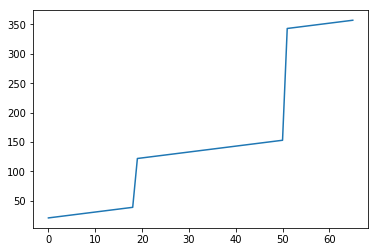

[ 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38
  39 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 343 344 345
 346 347 348 349 350 351 352 353 354 355 356 357]


In [10]:
H = 400
Ylist = np.arange(0,400-42)
Xlist = np.arange(0,400-42)
xcoor = np.random.randint(42,400-42,10)
ycoor = np.random.randint(42,400-42,10)

for i in range(10):
    Xlist[xcoor[i]-21:xcoor[i]+21] = 0
    Ylist[ycoor[i]-21:ycoor[i]+21] = 0
Xlist = np.unique(Xlist)
Ylist = np.unique(Ylist)
Xlist = Xlist[Xlist>=21]
# for i in range(10):
#     print(np.isin(np.arange(xcoor[i]-21,xcoor[i]+21),Xlist))
plt.plot(Xlist)
plt.show()
print(Xlist)


In [26]:

salDir = "/home/vijayraj/Workspace/Acads/EE698K/Project/dataset/dataset1/salImgs/"
rawDir = "/home/vijayraj/Workspace/Acads/EE698K/Project/dataset/dataset1/rawImgs/"
imgfiles=[]
imgfiles2=[]
imgfiles += [each for each in os.listdir(salDir) if each.endswith('.jpg')]
imgfiles2 += [each for each in os.listdir("/home/vijayraj/Workspace/Acads/EE698K/Project/dataset/dataset1/rawImgs") if each.endswith('.jpg')]
print(imgfiles[0].split(".")[0][1:])

# input()
count = 0
for file in imgfiles:
    salImg = cv2.imread(salDir+file,0)
    origImg = cv2.imread(rawDir+file.split(".")[0][1:]+".jpg")
#     cv2.imshow("orig",origImg)
#     cv2.waitKey(10)
#     print(file.split(".")[0][1:])
#     input()
    for j in [(400,400),(250,250),(150,150)]:
#         print(j)
        imgS = cv2.resize(salImg,j)
        imgO = cv2.resize(origImg,j)
#         print(imgS.shape)
    
        ycoorP,xcoorP = np.nonzero(imgS>255*0.9)
        xcoorP = xcoorP[np.random.randint(xcoorP.shape[0], size=10)]
        ycoorP = ycoorP[np.random.randint(ycoorP.shape[0], size=10)]
        ycoorN,xcoorN = np.nonzero(imgS<255*0.1)
        xcoorN = xcoorN[np.random.randint(xcoorN.shape[0], size=10)]
        ycoorN = ycoorN[np.random.randint(ycoorN.shape[0], size=10)]
#     H = 400
#     Ylist = np.arange(0,400-42)
#     Xlist = np.arange(0,400-42)
#     xcoor = np.random.randint(42,400-42,10)
#     ycoor = np.random.randint(42,400-42,10)
    # function to get xcoorP and ycoorP
#     for i in range(10):
#         Xlist[xcoorP[i]-21:xcoorP[i]+21] = 0
#         Ylist[ycoorP[i]-21:ycoorP[i]+21] = 0
#     Xlist = np.unique(Xlist)
#     Ylist = np.unique(Ylist)
#     Xlist = Xlist[Xlist>=21]
#     Ylist = ylist[Ylist>=21]
#     xcoorN = np.random.sample(Xlist,10)
#     ycoorN = np.random.sample(Ylist,10)
        for i in range(10):
            patchP1 = imgO[ycoorP[i]-21:ycoorP[i]+21,xcoorP[i]-21:xcoorP[i]+21]
            patchP2 = cv2.flip(patchP1,0)
            patchN1 = imgO[ycoorN[i]-21:ycoorN[i]+21,xcoorN[i]-21:xcoorN[i]+21]
            patchN2 = cv2.flip(patchN1,0)
            if count<=6480:
                saveDir = "/home/vijayraj/Workspace/Acads/EE698K/Project/dataset/train/"
            else :
                saveDir = "/home/vijayraj/Workspace/Acads/EE698K/Project/dataset/test/"
                
            cv2.imwrite(saveDir + "/1/"+"patchP_"+str(count)+".png",patchP1)
            cv2.imwrite(saveDir + "/0/"+"patchN_"+str(count)+".png",patchN1)
            cv2.imwrite(saveDir + "/1/"+"patchP_"+str(count+1)+".png",patchP2)
            cv2.imwrite(saveDir + "/0/"+"patchN_"+str(count+1)+".png",patchN2)
            count= count+2
    

26

26
48
11
2
86
73
114
107
13
108
47
101
38
104
43
51
102
96
93
70
21
118
88
54
111
74
35
65
76
41
34
106
63
53
4
119
37
14
79
39
82
25
58
40
12
27
32
42
78
66
23
64
8
45
89
1
68
59
22
100
33
61
80
60
10
18
5
49
44
16
20
75
113
31
50
67
90
92
30
110
87
97
56
17
94
72
46
62
109
28
120
71
29
36
116
55
52
3
98
115
9
6
57
95
15
83
91
7
19
24
112
84
81
85
69
103
117
77
99
105


In [18]:
# np.random.random(Xlist)

NameError: name 'Xlist' is not defined

In [28]:
3*3*288

2592

4

In [14]:
int("1")

1